In [1]:
# Capstone Project - Heart Disease Prediction
# Dataset - data.xlsx in folder '1582800613_project3datadictionary' as downloaded from website

In [2]:
# Initial preparation to work on Python
# Import packages pandas, numpy and os

import pandas as pd
import numpy as np
import os

In [3]:
# Get current working directory

os.getcwd()

# Current working directory will be used for this project

'/home/labsuser/Capstone'

In [4]:
os.chdir('/home/labsuser/Capstone')

In [5]:
os.getcwd()

'/home/labsuser/Capstone'

In [6]:
# Read the dataset

heart = pd.read_excel('data.xlsx')

In [7]:
# Output the dataset

heart

# dataset has 303 rows and 14 columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# Initial check of the data

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Initial check of the data

heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# Check for Null values or missing data

heart.isna().sum()

# There are no null values
# There are Zero values whaich are important to the dataset for analysis
# They need to be retailed

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Check for data types

heart.dtypes

# Data is all integer except for the oldpeak which is float64
# Data to be retained in current format

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# Additional check for data integrity

heart.info()

# 303 non-null values in dataset with 14 columns - all integer except oldpeak is float64
# 13 independent variables and 1 dependent variable - 'target' (which needs to be predicted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Dataset structure - 13 variables as under:
# Categorical values - 7 - sex, cp, restecg, exang, slope, ca and thal
# Boolean values - 1 - fbs
# Numberic values - 5 - age, trestbps, chol, thalach, oldpeak

In [14]:
# Check the value counts for the target variable

heart['target'].value_counts()

# Data indicates heart disease risk higher for 165 and low for 138
# There is good balance between positive and negative CVD cases

1    165
0    138
Name: target, dtype: int64

In [15]:
# Check the number of males and females in the dataset

heart['sex'].value_counts()

# There are 207 males and 96 females

1    207
0     96
Name: sex, dtype: int64

In [16]:
# Import the plot packges 

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Check the statistical output of all the variables

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# Check the correlation between the variables to understand the relationship between all the variables

heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


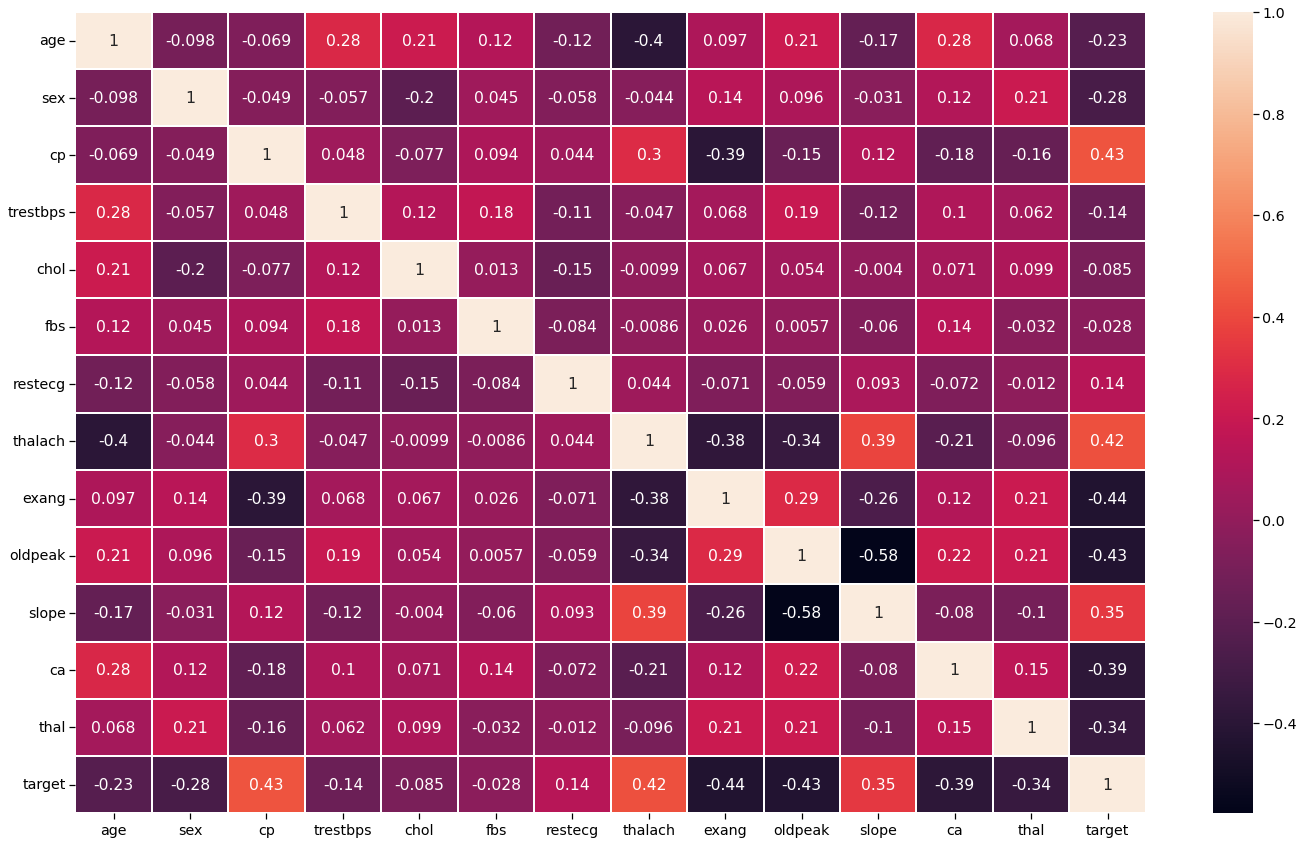

In [19]:
# For better visualization of the correlation, convert the above into a heat map

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart.corr(),annot=True,linewidth =2)
plt.tight_layout()

# The following can be inferred from the heat map:
# 1. cp, restecg, thalach and slope have a high positive correlation with the target variable
# 2. exang - exercise induced angina and oldpeak - ST depression induced by exercise relative to rest -
# - have high negative correlation to target indicating more stress/blood requirement by heart during exercise
# Other variables are negatively correlated to the target variable
# 3. There is also a higher positive correlation between variables as below:
#    a. thalach and cp
#    b. slope and thalach
# thalach - highset heart rate achieved therefore needs further analysis

In [20]:
# Carry out univariate analysis
# AGE
# Age distribution - min, max, median
# Age classification into young, middle and old ages
# Create various plots to analyse the data
# 1. Age distribution

min(heart.age)

29

In [21]:
max(heart.age)

77

In [22]:
heart.age.mean()

54.366336633663366

In [23]:
# Minimum age in the dataset is 29
# Maximum age in dataset is 77
# Mean age in the dataset is 54.36

In [24]:
# Grouping data to create bar plot

age_freq = heart.groupby('age').agg({'age':'count'})
age_freq

,age
age,
29,1
34,2
35,4
37,2
38,3
39,4
40,3
41,10
42,8


[Text(0, 3, '1'),
 Text(0, 3, '2'),
 Text(0, 3, '4'),
 Text(0, 3, '2'),
 Text(0, 3, '3'),
 Text(0, 3, '4'),
 Text(0, 3, '3'),
 Text(0, 3, '10'),
 Text(0, 3, '8'),
 Text(0, 3, '8'),
 Text(0, 3, '11'),
 Text(0, 3, '8'),
 Text(0, 3, '7'),
 Text(0, 3, '5'),
 Text(0, 3, '7'),
 Text(0, 3, '5'),
 Text(0, 3, '7'),
 Text(0, 3, '12'),
 Text(0, 3, '13'),
 Text(0, 3, '8'),
 Text(0, 3, '16'),
 Text(0, 3, '8'),
 Text(0, 3, '11'),
 Text(0, 3, '17'),
 Text(0, 3, '19'),
 Text(0, 3, '14'),
 Text(0, 3, '11'),
 Text(0, 3, '8'),
 Text(0, 3, '11'),
 Text(0, 3, '9'),
 Text(0, 3, '10'),
 Text(0, 3, '8'),
 Text(0, 3, '7'),
 Text(0, 3, '9'),
 Text(0, 3, '4'),
 Text(0, 3, '3'),
 Text(0, 3, '4'),
 Text(0, 3, '3'),
 Text(0, 3, '1'),
 Text(0, 3, '1'),
 Text(0, 3, '1')]

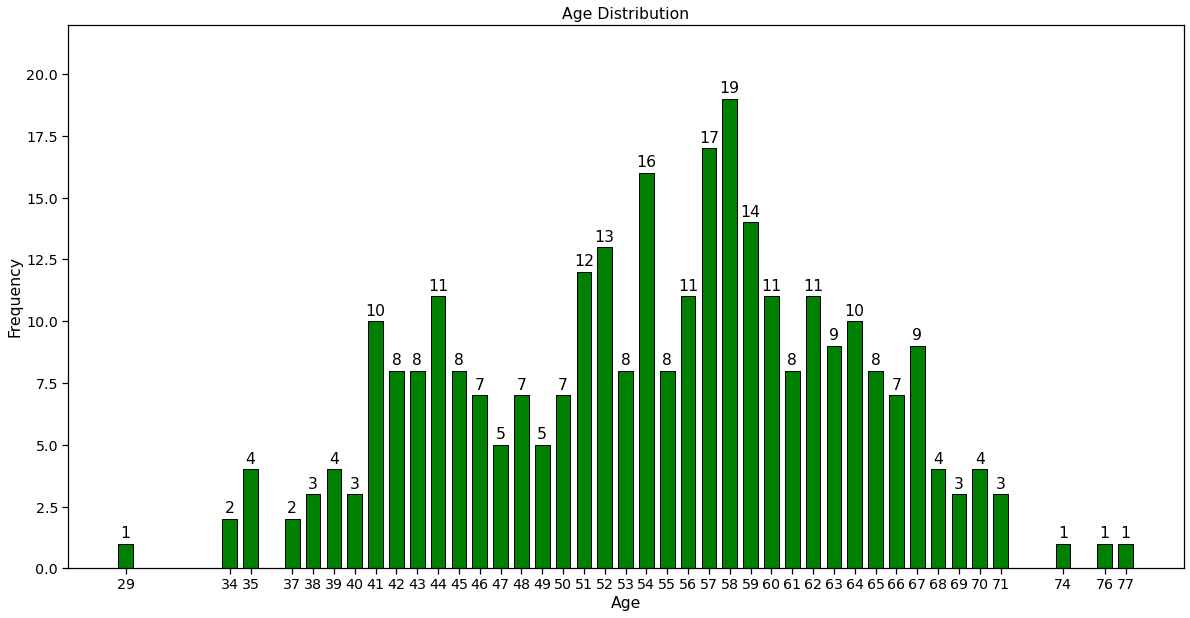

In [25]:
# Create a bar plot for age distribution

plt.figure(figsize = (20,10))
barplot = plt.bar(age_freq.index, age_freq.age, fc = 'green', ec = 'black', width = 0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim([0,22])
plt.xticks(age_freq.index)
plt.bar_label(barplot, labels = age_freq.age, label_type = 'edge', padding = 3)

In [26]:
# Categorizing the ages into 3 groups to understand the spread of data within the dataset
# Categorize into 3 categories - Young (25-40 yrs), Middle (40-55 yrs) and Old (>55 yrs)
# Create an additional column with the categorization

heart['Age_Category'] = np.where((heart.age >= 29) & (heart.age < 40),'Young Age',
                                 np.where((heart.age >= 40) & (heart.age < 55),'Middle Age','Old Age'))
heart                        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Old Age
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Middle Age
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Old Age
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Old Age


In [27]:
# Aggregate the data with the new categorization

age_category = heart.groupby('Age_Category').agg({'Age_Category' : 'count'}).apply(lambda x: x.sort_values(ascending = True).head(3))
age_category

,Age_Category
Age_Category,
Young Age,16
Middle Age,128
Old Age,159


[Text(0, 3, '16'), Text(0, 3, '128'), Text(0, 3, '159')]

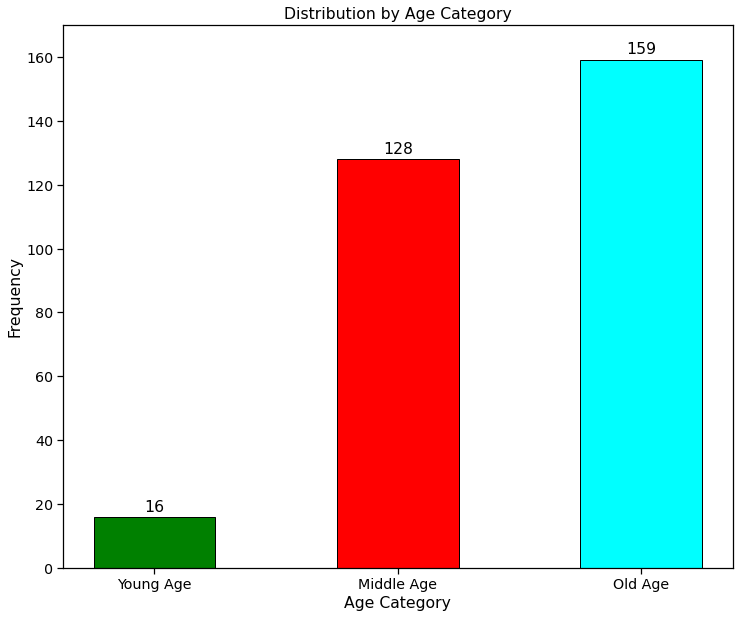

In [28]:
# Plot a barplot to see the distribution of samples in the dataset by age category

plt.figure(figsize = (12,10))
barplot = plt.bar(age_category.index, age_category.Age_Category,
                  color = ['green', 'red', 'cyan'], ec = 'black', width = 0.5)
plt.title('Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.ylim([0,170])
plt.xticks(age_category.index)
plt.bar_label(barplot, labels = age_category.Age_Category, label_type = 'edge', padding = 3)

# It is seen that the dataset has maximum old age - 159, middle age - 128 and young age - 16

In [29]:
# Understand and check the relation between high risk CVD to the age group

age_group = heart.groupby('Age_Category')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
age_group

# In the Young age group, there are 12 cases with CVD
# In the Middle age group, there are 88 cases of CVD
# In the Old age group, there are 65 cases of CVD

,Age_Category,Total_CVD
0,Middle Age,88
1,Old Age,65
2,Young Age,12


In [30]:
# Create a new dataframe to display the overall statistics of CVD with respect to age

age_grouptotal = pd.DataFrame({'Age_Category' : ['Young Age', 'Middle Age', 'Old Age'],
                               'Total_CVD' : [12, 88, 65], 'Total' : [16, 128, 159]})
age_grouptotal

,Age_Category,Total_CVD,Total
0,Young Age,12,16
1,Middle Age,88,128
2,Old Age,65,159


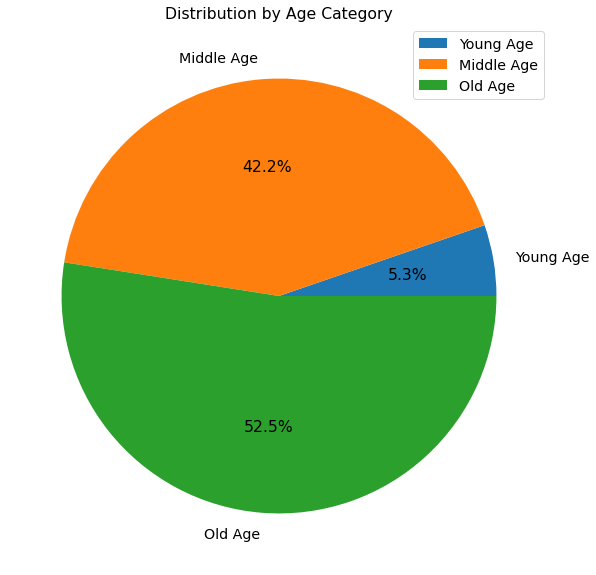

In [31]:
# Create a pie chart to understand the % distribution of the population

plt.figure(figsize = (10,10))
plt.pie(age_grouptotal.Total, labels = age_grouptotal.Age_Category, autopct = '%.1f%%')
plt.title('Distribution by Age Category')
plt.legend()

# Population distribution is as follows:
# 1. Young age - 5.3% of the total 303
# 2. Middle age - 42.2% of the total 303
# 3. Old age - 52.5% of the total 303

In [32]:
# Add a % of the population column to the dataframe

age_grouptotal['Percent_Population'] = round((age_grouptotal['Total_CVD']/
                                        age_grouptotal['Total']) * 100, 2)
age_grouptotal

,Age_Category,Total_CVD,Total,Percent_Population
0,Young Age,12,16,75.00
1,Middle Age,88,128,68.75
2,Old Age,65,159,40.88


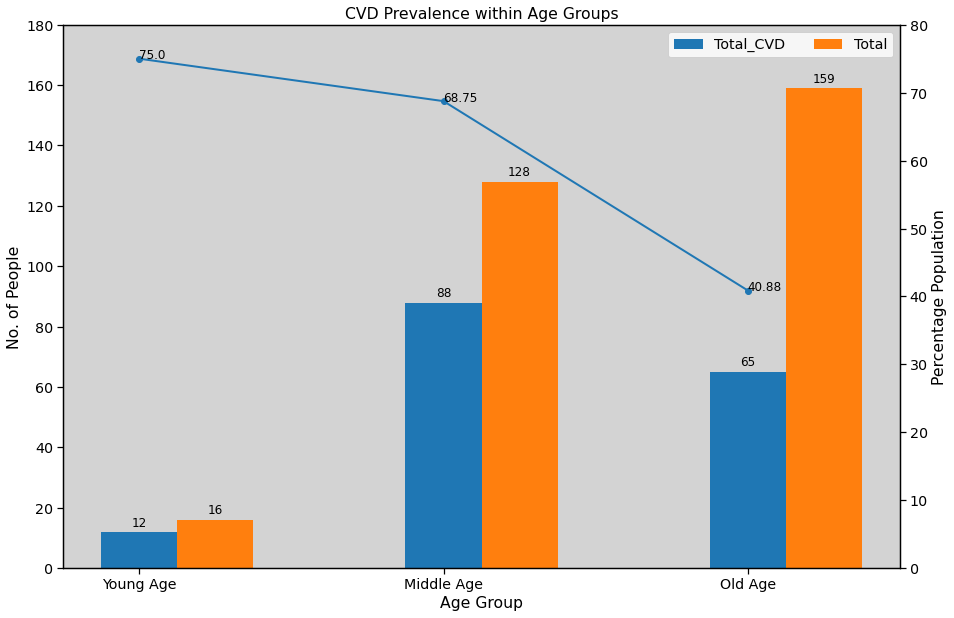

In [33]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

age_cat = ('Young Age', 'Middle Age', 'Old Age') # Label location
cvd_means = {'Total_CVD' : (12, 88, 65),
            'Total' : (16, 128, 159)}            # Define the labels
pp_means = {'Percent_Population' : (75, 68.8, 40.9)}
x = np.arange(len(age_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim(0,180)
ax.set_facecolor('lightgray')
ax.grid(False)
ax.set_title('CVD Prevalence within Age Groups')
ax.set_xlabel('Age Group')
ax.set_ylabel('No. of People')
ax.set_xticks(x, age_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(age_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o', linewidth = 2.0)
ax2.set_ylim(0,80)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in age_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [34]:
# Inferences:
# Of the 165 total high risk CVD cases:
# 1. 12 out 16 Young age are CVD high risk - 75%
# 2. 88 out of 128 Middle age are CVD high risk - 68.75%
# 3. 65 out of 159 Old age are CVD high risk - 40.9%
# It is thus interesting to note the following:
# 1. maximum high risk of CVD is with the young population followed by middle age
# 2. Old age people seem to be at lesser risk of CVD

In [35]:
# Refer Line 17 
# cp - Chest Pain Type - it has a high positive correlation with the target variable
# Analysis of Chest Pain Type - 
# 0 - Asympomatic, 1 - Non-anginal, 2 - Atypical Angina, 3 - Typical Angina
# 4 categorical variables
# Let us understand the distribution of the cp variable

cp_freq = heart.groupby('cp').agg({'cp':'count'})
cp_freq

# Inferences
# Of the 303 samples - 143 - asymptomatic, 50 - non-anginal pain, 87 - atypical angina & 23 - typical angina

,cp
cp,
0,143
1,50
2,87
3,23


[Text(0, 3, '143'), Text(0, 3, '50'), Text(0, 3, '87'), Text(0, 3, '23')]

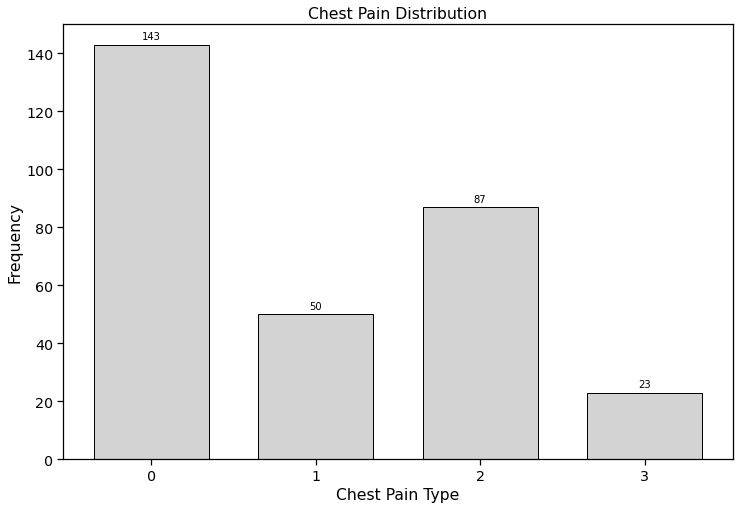

In [36]:
# Plot a barplot to see the distribution of samples in the dataset by type of chest pain

plt.figure(figsize = (12,8))
barplot = plt.bar(cp_freq.index, cp_freq.cp, fc = 'lightgray', ec = 'black', width = 0.7)
plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.ylim([0,150])
plt.xticks(cp_freq.index)
plt.bar_label(barplot, labels = cp_freq.cp, label_type = 'edge', padding = 3, fontsize = 10)

In [37]:
# Understand and check the relation between high risk CVD to the chest pain type

cp_group = heart.groupby('cp')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
cp_group

,cp,Total_CVD
0,0,39
1,1,41
2,2,69
3,3,16


In [38]:
# Create a new dataframe to display the overall statistics of CVD with type of chest pain

cp_grouptotal = pd.DataFrame({'cp' : [0, 1, 2 ,3],
                               'Total_CVD' : [39, 41, 69, 16], 'Total' : [143, 50, 87, 23]})
cp_grouptotal

,cp,Total_CVD,Total
0,0,39,143
1,1,41,50
2,2,69,87
3,3,16,23


In [39]:
# Add a % of the population column to the dataframe

cp_grouptotal['Percent_Population'] = round((cp_grouptotal['Total_CVD']/
                                        cp_grouptotal['Total']) * 100, 2)
cp_grouptotal

,cp,Total_CVD,Total,Percent_Population
0,0,39,143,27.27
1,1,41,50,82.00
2,2,69,87,79.31
3,3,16,23,69.57


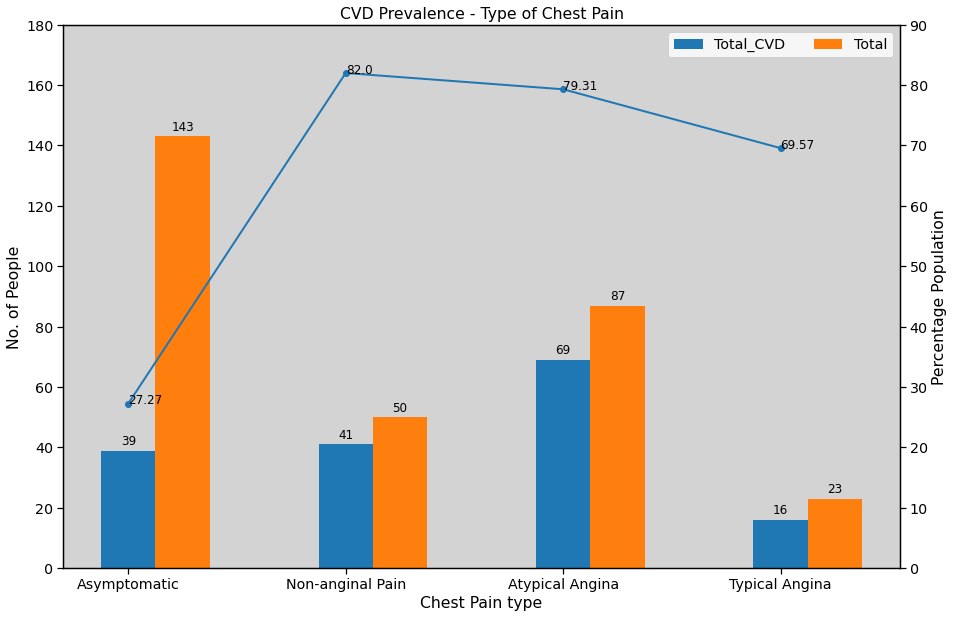

In [40]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

cp_cat = ('Asymptomatic', 'Non-anginal Pain', 'Atypical Angina', 'Typical Angina') # Label location
cvd_means = {'Total_CVD' : (39, 41, 69, 16),
            'Total' : (143, 50, 87, 23)}            # Define the labels
pp_means = {'Percent_Population' : (27.3, 82.0, 79.3, 69.6)}
x = np.arange(len(cp_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim(0,180)
ax.set_facecolor('lightgray')
ax.grid(False)
ax.set_title('CVD Prevalence - Type of Chest Pain')
ax.set_xlabel('Chest Pain type')
ax.set_ylabel('No. of People')
ax.set_xticks(x, cp_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(cp_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o', linewidth = 2.0)
ax2.set_ylim(0,90)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in cp_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [41]:
# Inferences:
# Of the 143 total asymptomatic cases, only 39 are high risk CVD cases - 27.3%
# Of the 50 total non-angina pain cases, 41 are high risk CVD cases - 82.0%
# Of the 87 total atypical angina cases, 69 are high risk CVD cases - 79.3%
# Of the 23 total typical angina cases, 23 are high risk CVD cases - 69.8%
# It may be noted that:
# 69.6% to 82.0% of the reported CVD cases are either non-anginal pain, atypical and typical angina
# Non-anginal pain at 82% has the highest % of positive CVD cases

In [42]:
# Refer Line 17 
# restecg - resting ecg has a high positive correlation with the target variable
# Analysis of resting ecg - categorical variable with 3 values
# 0 - normal, 1 - having ST-T, 2 - hypertrophy
# Let us understand the distribution of the resting ecg variable

restecg_freq = heart.groupby('restecg').agg({'restecg':'count'})
restecg_freq

# Inferences
# Of the 303 samples - 147 - normal, 152 - have ST-T and 4 - have hypertrophy

,restecg
restecg,
0,147
1,152
2,4


[Text(0, 3, '147'), Text(0, 3, '152'), Text(0, 3, '4')]

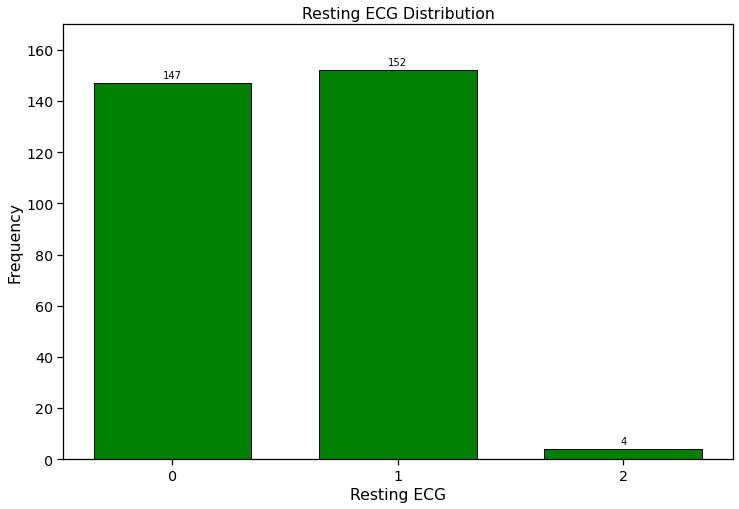

In [43]:
# Create a barplot to visualize the distribution of the resting ECG data

plt.figure(figsize = (12,8))
barplot = plt.bar(restecg_freq.index, restecg_freq.restecg, fc = 'green', ec = 'black', width = 0.7)
plt.title('Resting ECG Distribution')
plt.xlabel('Resting ECG')
plt.ylabel('Frequency')
plt.ylim([0,170])
plt.xticks(restecg_freq.index)
plt.bar_label(barplot, labels = restecg_freq.restecg, label_type = 'edge', padding = 3, fontsize = 10)

In [44]:
# Understand and check the relation between high risk CVD to resting ECG

restecg_group = heart.groupby('restecg')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
restecg_group

,restecg,Total_CVD
0,0,68
1,1,96
2,2,1


In [45]:
# Create a new dataframe to display the overall statistics of CVD with resting ECG

restecg_grouptotal = pd.DataFrame({'restecg' : [0, 1, 2],
                               'Total_CVD' : [68, 96, 1], 'Total' : [147, 152, 4]})
restecg_grouptotal

,restecg,Total_CVD,Total
0,0,68,147
1,1,96,152
2,2,1,4


In [46]:
# Add a % of the population column to the dataframe

restecg_grouptotal['Percent_Population'] = round((restecg_grouptotal['Total_CVD']/
                                        restecg_grouptotal['Total']) * 100, 2)
restecg_grouptotal

,restecg,Total_CVD,Total,Percent_Population
0,0,68,147,46.26
1,1,96,152,63.16
2,2,1,4,25.00


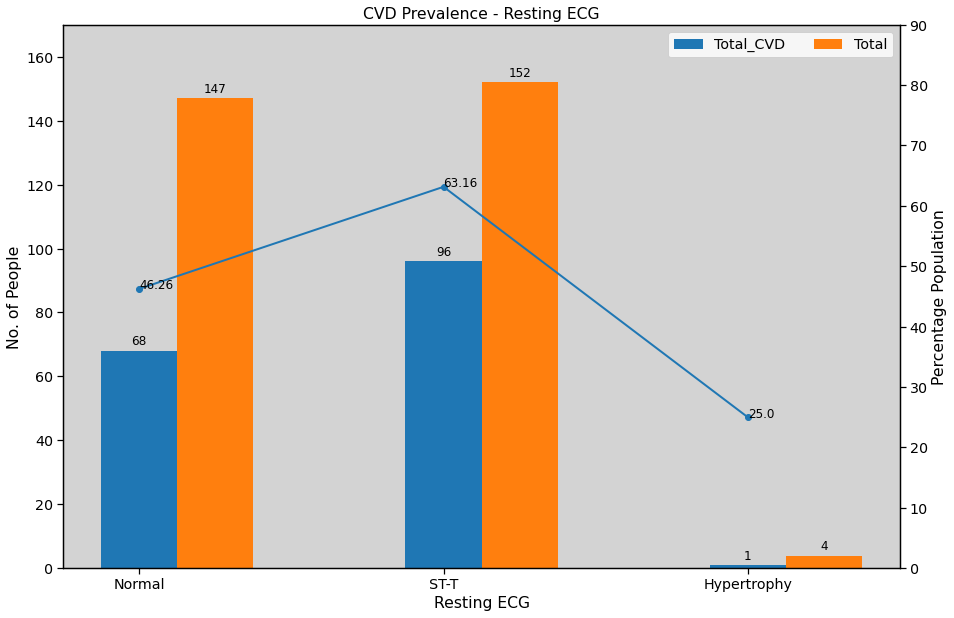

In [47]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

restecg_cat = ('Normal', 'ST-T', 'Hypertrophy') # Label location
cvd_means = {'Total_CVD' : (68, 96, 1),
            'Total' : (147, 152, 4)}            # Define the labels
pp_means = {'Percent_Population' : (46.3, 63.2, 25.0)}
x = np.arange(len(restecg_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim(0,170)
ax.set_facecolor('lightgray')
ax.grid(False)
ax.set_title('CVD Prevalence - Resting ECG')
ax.set_xlabel('Resting ECG')
ax.set_ylabel('No. of People')
ax.set_xticks(x, restecg_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(restecg_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o', linewidth = 2.0)
ax2.set_ylim(0,90)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in restecg_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [48]:
# Inferences:
# Of the 147 normal ECG cases, 68 are high risk CVD cases - 46.3%
# Of the 152 cases having ST-T, 96 are high risk CVD cases - 63.2%
# Of the 4 cases with Hypertrophy, 1 case is high risk CVD - 25.0%
# It may thus be noted that:
# 1. Maximum high risk of CVD are the ones with ST-T
# 2. The normal resting ecg cases also need to be monitored regularly for inconsistencies
# 3. 46.3% of normal ECG cases also show signs of high risk CVD

In [49]:
# Understanding the CVD cases in relation to the sex of the individual

sex_group = heart.groupby('sex')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
sex_group

,sex,Total_CVD
0,0,72
1,1,93


In [50]:
# Create a dataframe to analyze the datset further

sex_grouptotal = pd.DataFrame({'sex' : [0, 1],
                               'Total_CVD' : [72, 93], 'Total' : [96, 207]})
sex_grouptotal

,sex,Total_CVD,Total
0,0,72,96
1,1,93,207


In [51]:
# Add a pecentage of population column to the dataframe

sex_grouptotal['Percent_Population'] = round((sex_grouptotal['Total_CVD']/
                                        sex_grouptotal['Total']) * 100, 2)
sex_grouptotal

,sex,Total_CVD,Total,Percent_Population
0,0,72,96,75.00
1,1,93,207,44.93


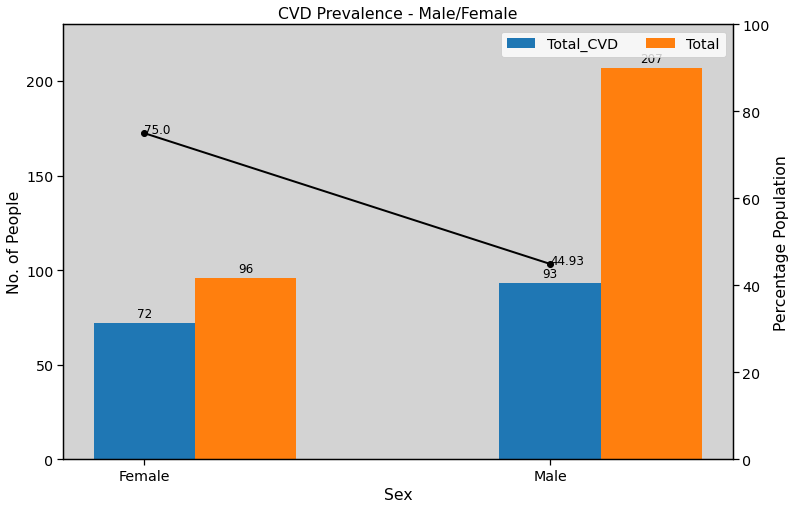

In [52]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

sex_cat = ('Female', 'Male') # Label location
cvd_means = {'Total_CVD' : (72, 93),
            'Total' : (96, 207)}            # Define the labels
pp_means = {'Percent_Population' : (75.0, 44.9)}
x = np.arange(len(sex_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0,230)
ax.set_facecolor('lightgray')
ax.grid(False)
ax.set_title('CVD Prevalence - Male/Female')
ax.set_xlabel('Sex')
ax.set_ylabel('No. of People')
ax.set_xticks(x, sex_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(sex_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o',
         linewidth = 2.0, color = 'black')
ax2.set_ylim(0,100)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in sex_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [53]:
# Inferences:
# 75% of the Female population are high risk CVD cases
# 44.6% of the Male population are high risk CVD cases

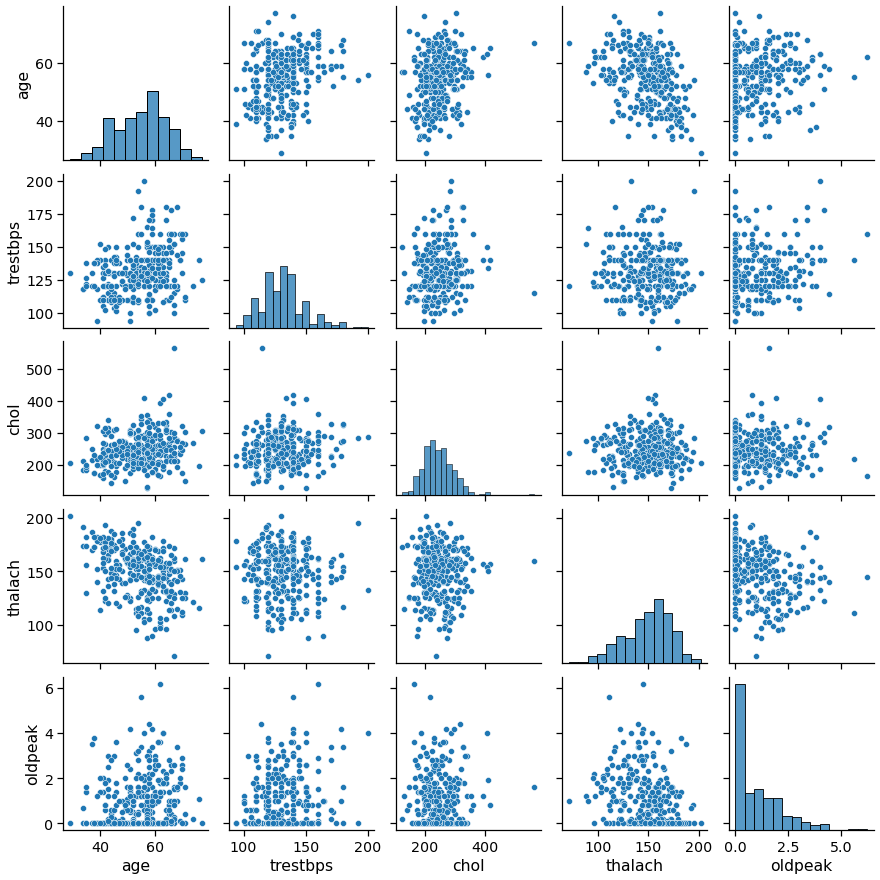

In [54]:
# Create a pair plot to study the correlation of continuous variables

sub_data = heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
sns.pairplot(sub_data)

In [55]:
# Refer Line 17 
# slope - slope of the peak exercise segment has a high positive correlation with the target variable
# Analysis of slope - categorical variable with 3 values
# 0 - upslope, 1 - flat, 2 - downslope
# Let us understand the distribution of the slope variable

slope_freq = heart.groupby('slope').agg({'slope':'count'})
slope_freq

# Inferences
# Of the 303 samples - 21 - upslope, 140 - have flat and 142 - downslope

,slope
slope,
0,21
1,140
2,142


In [56]:
# Understanding the CVD cases in relation to the ST depression slope

slope_group = heart.groupby('slope')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
slope_group

,slope,Total_CVD
0,0,9
1,1,49
2,2,107


In [57]:
# Create a dataframe to analyse the data of ST depression slope further

slope_grouptotal = pd.DataFrame({'slope' : [0, 1, 2],
                               'Total_CVD' : [9, 49, 107], 'Total' : [21, 140, 142]})
slope_grouptotal

,slope,Total_CVD,Total
0,0,9,21
1,1,49,140
2,2,107,142


In [58]:
# Add percentage of population column to the dataframe

slope_grouptotal['Percent_Population'] = round((slope_grouptotal['Total_CVD']/
                                        slope_grouptotal['Total']) * 100, 2)
slope_grouptotal

,slope,Total_CVD,Total,Percent_Population
0,0,9,21,42.86
1,1,49,140,35.00
2,2,107,142,75.35


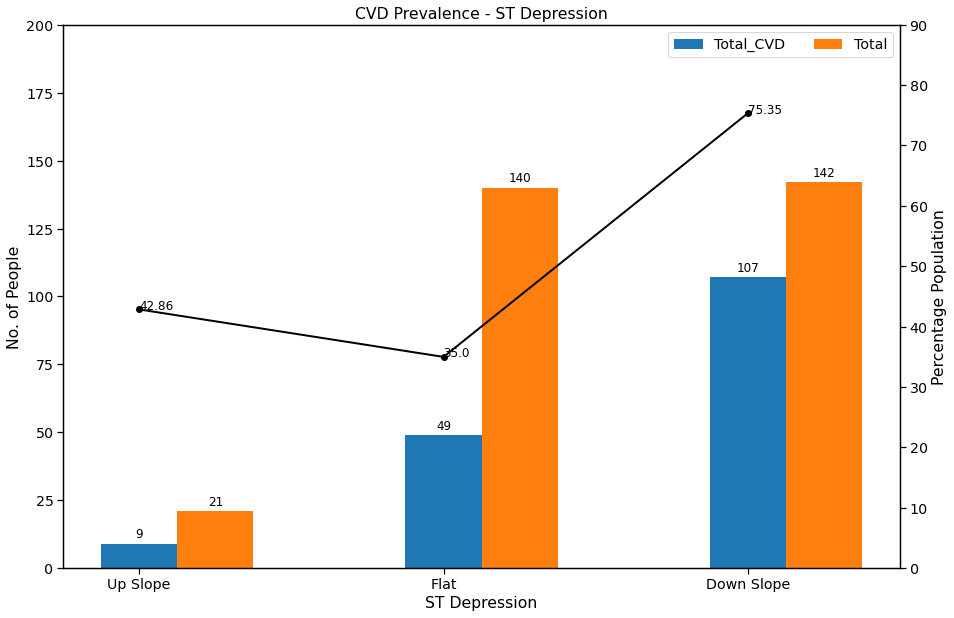

In [59]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

slope_cat = ('Up Slope', 'Flat', 'Down Slope') # Label location
cvd_means = {'Total_CVD' : (9, 49, 107),
            'Total' : (21, 140, 142)}            # Define the labels
pp_means = {'Percent_Population' : (42.9, 35.0, 75.4)}
x = np.arange(len(slope_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim(0,200)
ax.set_facecolor('white')
ax.grid(False)
ax.set_title('CVD Prevalence - ST Depression')
ax.set_xlabel('ST Depression')
ax.set_ylabel('No. of People')
ax.set_xticks(x, slope_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(slope_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o',
         linewidth = 2.0, color = 'black')
ax2.set_ylim(0,90)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in slope_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [60]:
# Inferences
# slope - CVD instances are highest for ST depression down slope cases at 75.4% of the cases
# slope - CVD instances are below 50% for ST depression up slope and and flat 

(0.0, 70.0)

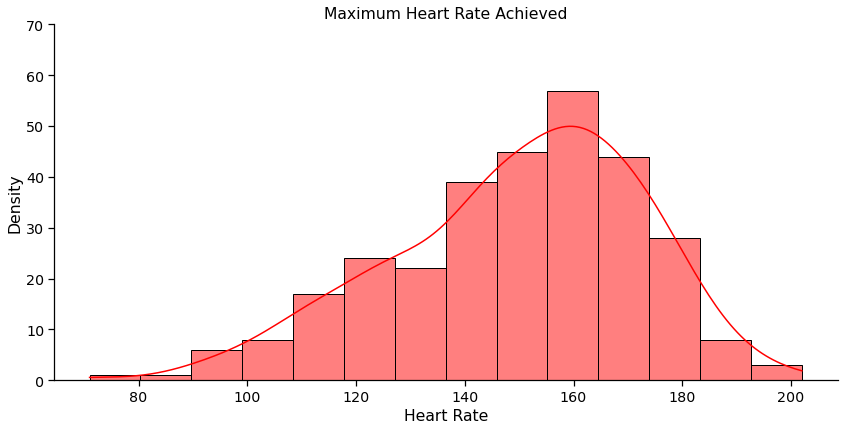

In [61]:
# Refer Line 17 
# thalach - maximum heart rate achieved has a high positive correlation with the target variable
# Analysis of thalach variable
# Let us understand the distribution of the maximum heart rate achieved variable

sns.displot(heart.thalach, color = 'red', kde = True, height = 6, aspect = 2)
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.ylim(0, 70)

Text(0, 0.5, 'Maximum Heart Rate Reached')

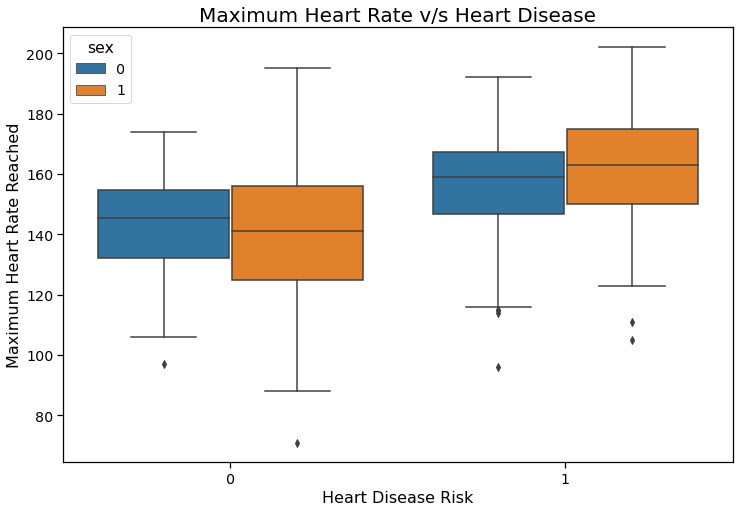

In [62]:
# Understand the distribution of the data of highest heart rate achieved
# Study the data in relation to the target variable and sex of the individual
# Use a box plot to understand the min, max, median and outliers in the dataset

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'target', y = 'thalach', hue = 'sex', data = heart)
plt.title('Maximum Heart Rate v/s Heart Disease', fontsize = 20)
plt.xlabel('Heart Disease Risk', fontsize = 16)
plt.ylabel('Maximum Heart Rate Reached', fontsize = 16)

In [63]:
# Inferences
# High risk CVD (positive patients) shows a higher median
# The median values for male and female is not very different in bith cases
# Males have a higher range of maximum heart rate reached than females

In [64]:
# Refer Line 17
# There are 2 variables which have a high negative correlation to the target variable
# exang - exercise induced angina - (-) 0.44
# oldpeak - ST depression induced by exercise - (-) 0.43
# We need to analyze these 2 variables in more detail
# 1. exang - 1 - yes, 0 - no

exang_freq = heart.groupby('exang').agg({'exang':'count'})
exang_freq

# Inferences
# Of the 303 samples - 204 - No exercise induced angina, 99 - Yes to exercise induced angina

,exang
exang,
0,204
1,99


In [65]:
# Understanding the CVD cases in relation to the exercise induced angina

exang_group = heart.groupby('exang')['target'].apply(lambda x: (x == 1).sum()).reset_index(name = 'Total_CVD')
exang_group

,exang,Total_CVD
0,0,142
1,1,23


In [66]:
# Create a dataframe to analyse the data of exercise induced angina further

exang_grouptotal = pd.DataFrame({'exang' : [0, 1],
                               'Total_CVD' : [142, 23], 'Total' : [204, 99]})
exang_grouptotal

,exang,Total_CVD,Total
0,0,142,204
1,1,23,99


In [67]:
# Add percentage of population column to the dataframe

exang_grouptotal['Percent_Population'] = round((exang_grouptotal['Total_CVD']/
                                        exang_grouptotal['Total']) * 100, 2)
exang_grouptotal

,exang,Total_CVD,Total,Percent_Population
0,0,142,204,69.61
1,1,23,99,23.23


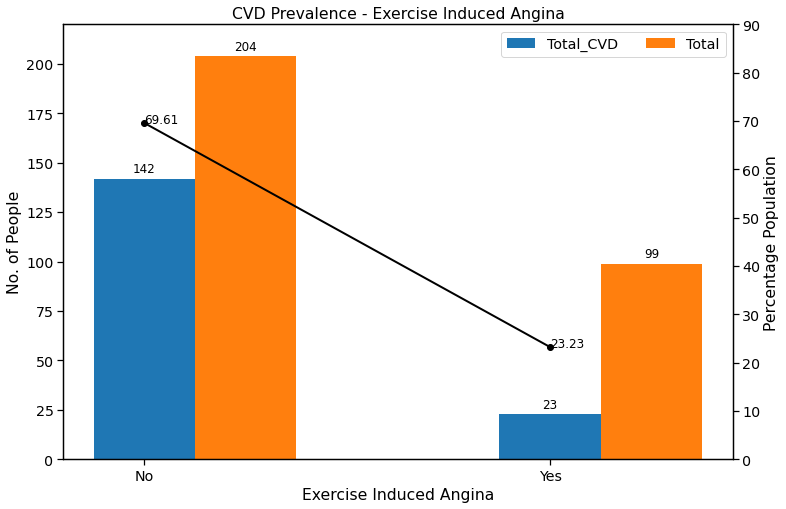

In [68]:
# Create a combined multiple bar plot and line plot to visualize the data of CVD prevalence

exang_cat = ('No', 'Yes') # Label location
cvd_means = {'Total_CVD' : (142, 23),
            'Total' : (204, 99)}            # Define the labels
pp_means = {'Percent_Population' : (42.9, 35.0, 75.4)}
x = np.arange(len(exang_cat))
width = 0.25                  # Width of the bar
multiplier = 0                # Multiplier
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0,220)
ax.set_facecolor('white')
ax.grid(False)
ax.set_title('CVD Prevalence - Exercise Induced Angina')
ax.set_xlabel('Exercise Induced Angina')
ax.set_ylabel('No. of People')
ax.set_xticks(x, exang_cat, rotation = 0)
for attribute, measurement in cvd_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3, fontsize = 12)
    multiplier += 1
ax.legend(loc = 'upper right', ncol = 2)
ax2 = ax.twinx()
ax2.plot(exang_grouptotal['Percent_Population'].values, linestyle = '-', marker = 'o',
         linewidth = 2.0, color = 'black')
ax2.set_ylim(0,90)
ax2.grid(False)
ax2.set_ylabel('Percentage Population')
for i, j in exang_grouptotal.Percent_Population.items():
    ax2.annotate(str(j), xy = (i,j), fontsize = 12)

In [69]:
# Inferences
# Of the total positive cases, there are only 23.2% of cases where there has been exercise induced angina

(0.0, 100.0)

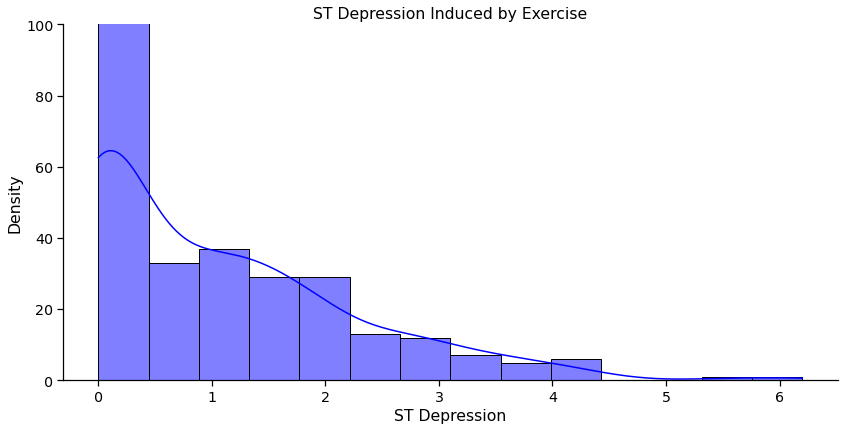

In [70]:
# Refer Line 64
# 2. oldpeak - ST depression induced by exercise relative to rest - (-) 0.43
# Continuous variable
# Let us understand the distribution of the maximum oldpeak variable

sns.displot(heart.oldpeak, color = 'blue', kde = True, height = 6, aspect = 2)
plt.title('ST Depression Induced by Exercise')
plt.xlabel('ST Depression')
plt.ylabel('Density')
plt.ylim(0, 100)

(-1.0, 7.0)

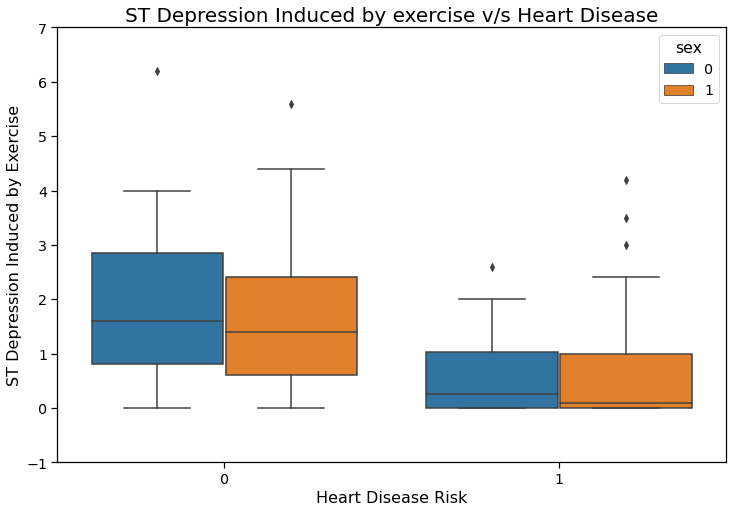

In [71]:
# Understand the distribution of the data of ST depression induced by exercise
# Study the data in relation to the target variable and sex of the individual
# Use a box plot to understand the min, max, median and outliers in the dataset

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'target', y = 'oldpeak', hue = 'sex', data = heart)
plt.title('ST Depression Induced by exercise v/s Heart Disease', fontsize = 20)
plt.xlabel('Heart Disease Risk', fontsize = 16)
plt.ylabel('ST Depression Induced by Exercise', fontsize = 16)
plt.ylim(-1, 7)

In [72]:
# Inferences
# In positive CVD cases, the median of ST depression induced by exercise is much low
# Lower ST depression induced by exercise median is indicative of heart disease
# In negative CVD cases, the median of ST depression induced by exercise for males and females is almost same

In [73]:
# filter CVD positive cases for further analysis

pos_data = heart[heart['target'] == 1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [74]:
# filter CVD positive cases for further analysis

neg_data = heart[heart['target'] == 0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [75]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age_Category'],
      dtype='object')

In [76]:
# Creating a dataframe to compare the mean of the positive CVD and negative CVD filtered data above

compare_data = pd.DataFrame({'Health Varaiable' : ['trestbps', 'chol', 'thalach', 'oldpeak'],
                             'Pos_CVD_Mean' : [129.3, 242.2, 158.5, 0.58],
                             'Neg_CVD_Mean' : [134.4, 251.1, 139.1, 1.58]})
compare_data

,Health Varaiable,Pos_CVD_Mean,Neg_CVD_Mean
0,trestbps,129.30,134.40
1,chol,242.20,251.10
2,thalach,158.50,139.10
3,oldpeak,0.58,1.58


In [77]:
# Inferences
# In positive cases, the highest heart rate achieved is much higher than negative cases
# In positive cases, the ST depression induced by exercise is very low compared to negative cases
# Ratio is almost 1/3rd for positive cases in terms of ST depression induced by exercise

In [78]:
heart1 = heart.drop(['Age_Category'], axis = 1)
heart1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
# Model building - Logistic Regression
# Import packages

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [80]:
# Assigning the 13 variables to X and the last column to Predictor Y

x = heart.drop(['target', 'Age_Category'], axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [81]:
y = heart.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [82]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2, random_state = 1)

In [83]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0


In [84]:
df_test = pd.concat([x_test, y_test], axis = 1)
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


In [85]:
x_train.shape

(242, 13)

In [86]:
y_train.shape

(242,)

In [87]:
x_test.shape

(61, 13)

In [88]:
y_test.shape

(61,)

In [89]:
# Normalize the train and test data prior to regression
# Import the package StandardScaler from sklearn

from sklearn.preprocessing import StandardScaler

In [90]:
# Normalize the x_train and x_test data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
# Logistic Regression
# Get instance of the model & fit the train model

model1 = LogisticRegression(random_state = 1)
model1.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [92]:
# Get the y predictions
# print the model accuracy classification report

y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [93]:
# Logistic Regression accuracy is 74%

In [94]:
# K-NN - K-Nearest Neighbors
# Import package

from sklearn.neighbors import KNeighborsClassifier

In [95]:
# Get instance of the model & fit the train model

model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [96]:
# Get the y predictions
# print the model accuracy classification report

y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [97]:
# K-NN - K-Nearest Neighbors accuracy - 75%

In [98]:
# Support Vector Machine
# Import package

from sklearn.svm import SVC

In [99]:
# Get instance of the model & fit the train model

model3 = SVC(random_state = 1)
model3.fit(x_train, y_train)

SVC(random_state=1)

In [100]:
# Get the y predictions
# print the model accuracy classification report

y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [101]:
# Support Vector Machine SVC accuracy is 75%

In [102]:
# Naives Bayer Classifier
# Import package

from sklearn.naive_bayes import GaussianNB

In [103]:
# Get instance of the model & fit the train model

model4 = GaussianNB()
model4.fit(x_train, y_train)

GaussianNB()

In [104]:
# Get the y predictions
# print the model accuracy classification report

y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [105]:
# Naives Bayer Classifier accuracy - 77%

In [106]:
# Decision Tree
# Import package

from sklearn.tree import DecisionTreeClassifier

In [107]:
# Get instance of the model & fit the train model

model5 = DecisionTreeClassifier(random_state = 1)
model5.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [108]:
# Get the y predictions
# print the model accuracy classification report

y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [109]:
# Decision Tree Classifier accuracy is 69%

In [110]:
# Random Forest
# Import package

from sklearn.ensemble import RandomForestClassifier

In [111]:
# Get instance of the model & fit the train model

model6 = RandomForestClassifier(random_state = 1)
model6.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [112]:
# Get the y predictions
# print the model accuracy classification report

y_pred6 = model6.predict(x_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [113]:
# Random Forest Classifier accuracy is 80%

In [114]:
# Random Forest Classifier accuracy is the highest of all models - 80%

In [115]:
# Confusion Matrix
# Import package

from sklearn.metrics import confusion_matrix, accuracy_score

In [116]:
cm = confusion_matrix(y_test, y_pred6)
cm

array([[21,  9],
       [ 3, 28]])

In [117]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [118]:
# Accuracy of 80.32% is good as any accuracy > 70% is good to deploy a model
# Inferences from Confusion Matrix
# True Positives (TP) - 21
# True Negatives (TN) - 28
# No. of errors - 9 & 3
# Type 1 error - False Positives (FP) - 9 - Predicted positive and its false
# Type 2 error - False Negatives (FN) - 3 - Predicted negative and its false
# Calculate accuracy - (TP + TN)/ (TP + TN + FP + FN) - Correct Predicted / Total
# Accuracy = (21 + 28) / (21 + 28 + 9 + 3)
# Accuracy - 49 / 61 = 80.32%

In [119]:
# Feature Importance

importance = model6.feature_importances_

In [120]:
# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

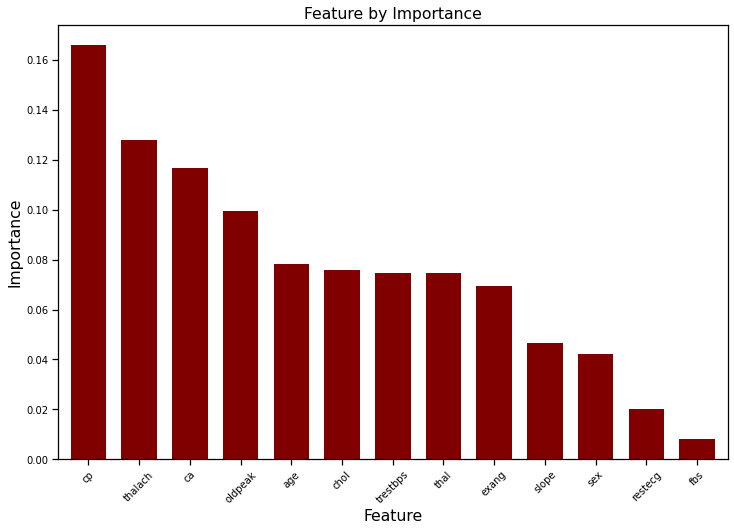

In [121]:
index = x.columns
importance = pd.Series(model6.feature_importances_, index = index)
importance.nlargest(13).plot(kind = 'bar', color = 'maroon', width = 0.7, figsize = (12, 8))
plt.title('Feature by Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

In [122]:
# Inferences
# The top 4 significant features that determine/predict CVD positivity are:
# 1. cp - Chest Pain type
# 2. thalach - maximum heart rate achieved
# 3. ca - number of major vessels coloured by flouroscopy
# 4. oldpeak - ST depression induced by exercise relative to rest

In [123]:
# Run the model on the test data to check the accuracy of the predictions

pred_array = model6.predict(x_test)
pred_array

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [124]:
# Create a dataframe to combine the predictions with the test data

pd.DataFrame(pred_array, columns = ['Pred_CVD'])

,Pred_CVD
0,0
1,1
2,0
3,0
4,0
...,...
56,1
57,0
58,1
59,0


In [125]:
# Create the new test data with the predicted values column

test_final = pd.concat([df_test.reset_index(drop = True),
                        pd.DataFrame(pred_array, columns = ['Pred_CVD'])], axis = 1)
test_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Pred_CVD
0,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0
1,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,1
2,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0
3,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0
4,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
57,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,0
58,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,1
59,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0


In [126]:
# The predictions and the target variables are binary
# Will therefore create a new Boolean column with True and False
# This will help to calculate the accuracy of the predictions

test_final['Predicted'] = np.where((test_final.target == test_final.Pred_CVD), 'True', 'False')
test_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Pred_CVD,Predicted
0,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0,True
1,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,1,True
2,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0,True
3,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0,True
4,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,True
57,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,0,True
58,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,1,False
59,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0,True


In [127]:
# Total the True and False in the predicted values

test_final.Predicted.value_counts()

# There are 49 True (which is 21 (TP) + 28 (TN) as per confusion matrix)
# The false predictions are 12 (which is 9 (FP) and 3 (FN) as per confusion matrix)

True     49
False    12
Name: Predicted, dtype: int64

In [128]:
# Calculate the error False/Total

12/61

# Error in prediction is 19.67%

0.19672131147540983

In [129]:
# Accuracy of prediction is 1 - Error

1 - 12/61

# Accuracy of prediction is 80.32%
# this matches with the train data accuracy of 80.32%

0.8032786885245902

In [130]:
# Our model is therefore accurate in predition of the heart condition and can be used

In [131]:
# Check the Coefficient of Determination - R-Squared value of the model on the test data

from sklearn.metrics import r2_score

In [132]:
# Coefficient of Determination - R-Squared

r2_score(test_final.target,test_final.Pred_CVD)

0.2129032258064516

In [133]:
# Since the number of variables are 13, we would need to arrive at the adjusted R-Squared

1 - r2_score(test_final.target,test_final.Pred_CVD)

0.7870967741935484

In [134]:
# The Adjusted R_Squared value is 78.71%
# This value is very close to the accuracy of the model
# The model can thus be deployed for accurate predictions of heart disease

In [135]:
# Final Conclusions

# The top 4 significant features (out of the 13) that helped predict a positive/negative diagnosis are:
# 1. cp - chest pain type
# 2. thalach - maximum heart rate achieved
# 3. ca - number of major vessels and 
# 4. oldpeak - ST depression induced by exercise relative to rest

# Random Forest algorithm yields the maximum accuracy of 80.32%
# The model worked well on the test data and thus assumed to be accurate for use
# Coefficient of Determination - R-Squared is 0.213
# Adjsuted R-Squared is 78.70
# The model is thus well suited to be deployed in predicting heart conditions